In [1]:
import pandas as pd
import fastdup
import os
import numpy as np
import math

In [2]:
import cv2
from matplotlib import pyplot as plt

In [3]:
sorted_folder = '/home/yiwei/Documents/New Fast Image Analysis/Karta_sorted_images'

In [4]:
karta_out_folder = '/home/yiwei/Documents/New Fast Image Analysis/Karta_out'

# 1. find images in Rest_set similar to images in Basic_set and set their punishment value

## 1.1 find images based on similarity.csv

In [7]:
df_all_similarity = pd.read_csv(karta_out_folder+'/similarity.csv')

In [8]:
df_rest_punish = pd.DataFrame(columns=['Basic_set', 'Rest_set', 'distance'])

for i in range(len(df_all_similarity.index)):
    if df_all_similarity['from'][i].split('/')[-2] == "Basic_set" and df_all_similarity['to'][i].split('/')[-2] != "Basic_set":
        new_row = [df_all_similarity['from'][i], df_all_similarity['to'][i], df_all_similarity['distance'][i]]
        df_rest_punish.loc[len(df_rest_punish)] = new_row
    elif df_all_similarity['from'][i].split('/')[-2] != "Basic_set" and df_all_similarity['to'][i].split('/')[-2] == "Basic_set":
        new_row = [df_all_similarity['to'][i], df_all_similarity['from'][i], df_all_similarity['distance'][i]]
        df_rest_punish.loc[len(df_rest_punish)] = new_row
    else:
        pass

In [9]:
df_rest_punish.drop_duplicates(inplace=True, ignore_index=True)
df_rest_punish.rename(columns={"distance":"similar distance"}, inplace=True)

In [10]:
print(df_rest_punish)

                                                                   Basic_set  \
0                Kartaview_Dataset/Basic_set/3270777_fbb04_5fb954f36c7b0.jpg   
1                Kartaview_Dataset/Basic_set/4442793_3f0e6_61f492718618e.jpg   
2                Kartaview_Dataset/Basic_set/4442793_fefb8_61f4924d228c3.jpg   
3   Kartaview_Dataset/Basic_set/3681045_79c2a90149507087d95ea7b005bdcd58.jpg   
4                Kartaview_Dataset/Basic_set/3270777_b2e98_5fb95546c7a24.jpg   
5                Kartaview_Dataset/Basic_set/4442793_48a14_61f492e0bad9f.jpg   
6                Kartaview_Dataset/Basic_set/3659221_b3688_60c3ec3a2837f.jpg   
7   Kartaview_Dataset/Basic_set/3681045_13ee6e0afd015f9ec85afcaa821b53c3.jpg   
8                Kartaview_Dataset/Basic_set/3659221_b2121_60c3ecc15088e.jpg   
9                Kartaview_Dataset/Basic_set/4442793_281d3_61f492ccda756.jpg   
10               Kartaview_Dataset/Basic_set/3659221_2511b_60c3ec45811c2.jpg   
11               Kartaview_Dataset/Basic

## 1.2 Save 'df_rest_punish' & similar pair to new folder

In [15]:
# make parent folder
sets_similar_folder = '/home/yiwei/Documents/New Fast Image Analysis/Karta_2sets_similar'
os.makedirs(sets_similar_folder, exist_ok=True)

In [26]:
# export 'df_rest_punish' as 'df_rest_punish.csv'
df_rest_punish.to_csv(sets_similar_folder + '/df_rest_punish.csv')

In [17]:
# save images into specific folder
basic_save_path = os.path.join(sets_similar_folder, 'basic')
if not os.path.exists(basic_save_path):
    os.makedirs(basic_save_path)
    
rest_save_path = os.path.join(sets_similar_folder, 'rest')
if not os.path.exists(rest_save_path):
    os.makedirs(rest_save_path)
    
startingDir = os.getcwd()
    
for i in range(len(df_rest_punish.index)):
    # Using cv2.imread() method to read the image
    img = cv2.imread(df_rest_punish['Basic_set'][i])
    # Filename
    filename = df_rest_punish['Basic_set'][i].split('/')[-1]
    # Change the current directory to specified directory 
    os.chdir(basic_save_path)
    # Using cv2.imwrite() method to save the image
    cv2.imwrite(filename, img)
    # change back to original directoy
    os.chdir(startingDir)
    
for i in range(len(df_rest_punish.index)):
    # Using cv2.imread() method to read the image
    img = cv2.imread(df_rest_punish['Rest_set'][i])
    # Filename
    filename = df_rest_punish['Rest_set'][i].split('/')[-1]
    # Change the current directory to specified directory 
    os.chdir(rest_save_path)
    # Using cv2.imwrite() method to save the image
    cv2.imwrite(filename, img)
    # change back to original directoy
    os.chdir(startingDir)
    

# 2. Manipulate 'all.score.csv'

## 2.1 Import 'all.score.csv'

In [48]:
df_all_score = pd.read_csv(sorted_folder+'/score/all_score.csv')

In [49]:
# Drop useless column
df_all_score.drop(columns=['Unnamed: 0.1', 'level_0', 'index', 'Unnamed: 0'], inplace = True)

## 2.2 Add distance from step 1 as similar punishment value column

In [11]:
df_rest_punish_part = df_rest_punish.drop_duplicates(subset=['Rest_set'], ignore_index=True)

In [50]:
# generate file name column
df_rest_punish_part['file name'] = np.nan
    
# set the last part of filepath as file name value
for i in range(len(df_rest_punish_part.index)):
    df_rest_punish_part.loc[i, 'file name'] = df_rest_punish_part['Rest_set'][i].split('/')[-1]
    
# set index as filename
df_all_score.set_index('file name', inplace=True)
df_rest_punish_part.set_index('file name', inplace=True)

# concatenate similar distance into 'df_all_score'
df_all_score = pd.concat([df_all_score, df_rest_punish_part['similar distance']], axis=1)

# reset index
df_all_score.reset_index(inplace=True)
df_rest_punish_part.reset_index(inplace=True)

# change NaN in column 'similar distance' as 0
for i in range(len(df_all_score.index)):
    if math.isnan(df_all_score['similar distance'][i]):
        df_all_score.at[i, 'similar distance'] = 0
    else:
        pass

/tmp/ipykernel_7588/4001838888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rest_punish_part['file name'] = np.nan
/tmp/ipykernel_7588/4001838888.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rest_punish_part.loc[i, 'file name'] = df_rest_punish_part['Rest_set'][i].split('/')[-1]


## 2.3 Delete labeled rows

In [51]:
for i in range(len(df_all_score.index)):
    if df_all_score['Labeled'][i] == 1:
        df_all_score.drop(i, inplace=True)
    else:
        pass

In [52]:
df_all_score.reset_index(inplace=True)

In [53]:
df_all_score.drop(columns=['index'], inplace = True)

# 3. Set weights and visualize 

In [54]:
print(df_all_score['blur'].max())
print(df_all_score['blur'].min())
print(df_all_score['brightness'].max())
print(df_all_score['brightness'].min())

1.0
0.0
1.0
0.0


## 3.1 set default weights

In [55]:
blur_weight = 0.2
brightness_weight = 0.05
outlier_weight = -0.15
similar_weight = -1

## 3.2 Compute score for 'df_all_score'

In [56]:
# generate score column
df_all_score['score'] = np.nan

In [57]:
# compute score
for i in range(len(df_all_score.index)):
    df_all_score.loc[i, 'score'] = (blur_weight*df_all_score.loc[i, 'blur']
                                         + brightness_weight*df_all_score.loc[i, 'brightness']
                                         + df_all_score.loc[i, 'uniqueness']*df_all_score.loc[i, 'uniqueness punishment']
                                         + outlier_weight*df_all_score.loc[i, 'outlier distance']
                                         + similar_weight*df_all_score.loc[i, 'similar distance']
                                            )

In [58]:
print(df_all_score)

                             file name  \
0      1165737_b123c_5ad36af36df14.jpg   
1      1165737_fd67c_5ad36b00599bd.jpg   
2      1169139_0d439_5add00c4db425.jpg   
3      1169139_6c3d9_5add00bd91530.jpg   
4      1169139_6f993_5add00c892f26.jpg   
...                                ...   
10481    54822_8fa60_58cea16dc7f04.jpg   
10482    54822_a4473_58cea13232758.jpg   
10483    54822_bcba4_58cea13feada8.jpg   
10484    54822_d72a3_58cea140a1fb5.jpg   
10485    54822_e2477_58cea1353fbde.jpg   

                                                         filepath      blur  \
0      Kartaview_Dataset/Rest_set/1165737_b123c_5ad36af36df14.jpg  0.403199   
1      Kartaview_Dataset/Rest_set/1165737_fd67c_5ad36b00599bd.jpg  0.126805   
2      Kartaview_Dataset/Rest_set/1169139_0d439_5add00c4db425.jpg  0.235236   
3      Kartaview_Dataset/Rest_set/1169139_6c3d9_5add00bd91530.jpg  0.162202   
4      Kartaview_Dataset/Rest_set/1169139_6f993_5add00c892f26.jpg  0.218967   
...                  

In [59]:
df_all_score.to_csv(sorted_folder + '/score/all_score_update.csv')

## 3.3 Generate Dataframe Dict

In [60]:
# create unique list of clusters
UniqueClusters = df_all_score.cluster.unique()

In [61]:
# create a data frame dictionary to store your data frames
DF_Dict_Score_new = {elem : pd.DataFrame() for elem in UniqueClusters}

for key in DF_Dict_Score_new.keys():
    DF_Dict_Score_new[key] = df_all_score[:][df_all_score.cluster == key]
    DF_Dict_Score_new[key].reset_index(inplace=True)
    DF_Dict_Score_new[key].drop(columns=['index'], inplace = True)

## 3.4 Use Cluster 12 as an example for result visualization

In [62]:
print(DF_Dict_Score_new[12])

                           file name  \
0    1165737_46ab6_5ad36af576532.jpg   
1    1165737_9bce0_5ad36af62ce64.jpg   
2    1165737_e02a4_5ad36ae81fdd3.jpg   
3    1165737_e25d7_5ad36af6e18cd.jpg   
4    1165737_fe9d0_5ad36b185fc88.jpg   
..                               ...   
450    51004_3dea3_58bcacbf56ee8.jpg   
451    51004_469fd_58bcad3ce92ca.jpg   
452    51004_df9b2_58bcac227f082.jpg   
453    54822_8919c_58cea142dd574.jpg   
454    54822_983ba_58cea16221e1e.jpg   

                                                       filepath      blur  \
0    Kartaview_Dataset/Rest_set/1165737_46ab6_5ad36af576532.jpg  0.295662   
1    Kartaview_Dataset/Rest_set/1165737_9bce0_5ad36af62ce64.jpg  0.257501   
2    Kartaview_Dataset/Rest_set/1165737_e02a4_5ad36ae81fdd3.jpg  0.073076   
3    Kartaview_Dataset/Rest_set/1165737_e25d7_5ad36af6e18cd.jpg  0.299432   
4    Kartaview_Dataset/Rest_set/1165737_fe9d0_5ad36b185fc88.jpg  0.176251   
..                                                       

In [63]:
print(DF_Dict_Score_new[12]['score'].max())
print(DF_Dict_Score_new[12]['score'].min())
print(DF_Dict_Score_new[12]['score'].idxmax())
print(DF_Dict_Score_new[12]['score'].idxmin())

0.988330900656883
-0.5149392287834088
25
430


In [73]:
print(DF_Dict_Score_new[19]['score'].min())
print(DF_Dict_Score_new[19]['score'].idxmin())

-0.7232732167843333
289


In [74]:
print(DF_Dict_Score_new[19].values[289])

['2988882_d0486_5f552a39ee1c2.jpg'
 'Kartaview_Dataset/Rest_set/2988882_d0486_5f552a39ee1c2.jpg'
 0.0823012389466267 0.39447273946049 19 21.620667 0 0.3179157969066337 0.5
 0.0 0.918415 -0.7232732167843333]


In [64]:
print(DF_Dict_Score_new[12].values[25])
print(DF_Dict_Score_new[12].values[430])

['1360360_4f7fc_5c9f7aca24928.jpg'
 'Kartaview_Dataset/Rest_set/1360360_4f7fc_5c9f7aca24928.jpg'
 0.198083199728688 0.462641364702793 12 102.231323 0 0.9255821924760058
 1.0 0.0 0.0 0.988330900656883]
['367210_5f433_59284291ed303.jpg'
 'Kartaview_Dataset/Rest_set/367210_5f433_59284291ed303.jpg'
 0.448592314448798 0.316734246452277 12 68.642334 0 0.5923251920084356 0.5
 0.0 0.916657 -0.5149392287834088]


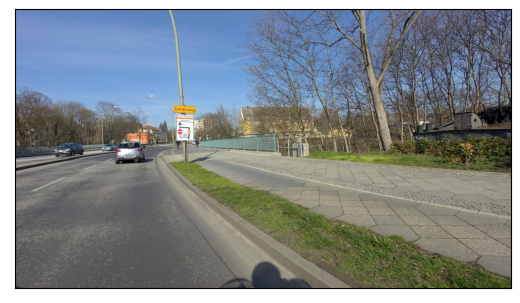

In [65]:
img = cv2.imread(DF_Dict_Score_new[12]['filepath'][25])
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

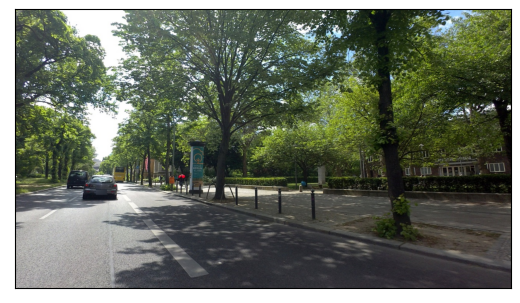

In [66]:
img = cv2.imread(DF_Dict_Score_new[12]['filepath'][430])
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

# 4. Generate rank of all images in Rest_set based on cluster priority and score

## 4.1 Create 3 Dataframe for different score regions(>0.8; 0.8-0.2; <0.2)

In [28]:
# create column list from 'df_all_score'
column_list = df_all_score.columns.values.tolist()

In [67]:
# create 3 data frame to store 'df_all_score'
df_good_score = pd.DataFrame(columns=column_list)
df_medium_score = pd.DataFrame(columns=column_list)
df_bad_score = pd.DataFrame(columns=column_list)

for i in range(len(df_all_score.index)):
    if df_all_score['score'][i] >= 0.8:
        df_good_score.loc[len(df_good_score.index)] = df_all_score.values[i]
    elif df_all_score['score'][i] >= 0.2:
        df_medium_score.loc[len(df_medium_score.index)] = df_all_score.values[i]
    else:
        df_bad_score.loc[len(df_bad_score.index)] = df_all_score.values[i]

In [68]:
print(len(df_good_score), len(df_medium_score), len(df_bad_score))

580 9220 686


## 4.2 Rank each Dataframe based on cluster priority and score

In [30]:
# read cluster priority file
df_labeled_info = pd.read_csv(sorted_folder+'/cluster_labeled_info.csv')

In [31]:
# generate 3 list for store different cluster id based on its priority
rank_1 = []
rank_2 = []
rank_3 = []

for i in range(len(df_labeled_info.index)):
    if (df_labeled_info['cluster rank'][i] == 1) | (df_labeled_info['cluster rank'][i] == 2):
        rank_1.append(df_labeled_info['cluster id'][i])
    elif (df_labeled_info['cluster rank'][i] == 3):
        rank_2.append(df_labeled_info['cluster id'][i])
    else:
        rank_3.append(df_labeled_info['cluster id'][i])

In [32]:
def rank_with_cluster(df_xxx_score, list_rank_1, list_rank_2, column_list_df):
    # create 3 data frame to store 'df_xxx_score'
    df_rank_1 = pd.DataFrame(columns=column_list_df)
    df_rank_2 = pd.DataFrame(columns=column_list_df)
    df_rank_3 = pd.DataFrame(columns=column_list_df)

    for i in range(len(df_xxx_score.index)):
        if df_xxx_score['cluster'][i] in list_rank_1:
            df_rank_1.loc[len(df_rank_1.index)] = df_xxx_score.values[i]
        elif df_xxx_score['cluster'][i] in list_rank_2:
            df_rank_2.loc[len(df_rank_2.index)] = df_xxx_score.values[i]
        else:
            df_rank_3.loc[len(df_rank_3.index)] = df_xxx_score.values[i]
            
    # sorting based on score column
    df_rank_1.sort_values("score", ascending = False, inplace = True)
    df_rank_2.sort_values("score", ascending = False, inplace = True)
    df_rank_3.sort_values("score", ascending = False, inplace = True)
    
    # create a new data frame for return result
    df_score_after_rank = pd.DataFrame()
    df_score_after_rank = pd.concat([df_score_after_rank, df_rank_1], ignore_index = True)
    df_score_after_rank = pd.concat([df_score_after_rank, df_rank_2], ignore_index = True)
    df_score_after_rank = pd.concat([df_score_after_rank, df_rank_3], ignore_index = True)
    
    return df_score_after_rank

In [69]:
df_good_score_after_rank = rank_with_cluster(df_good_score, rank_1, rank_2, column_list)
df_medium_score_after_rank = rank_with_cluster(df_medium_score, rank_1, rank_2, column_list)
df_bad_score_after_rank = rank_with_cluster(df_bad_score, rank_1, rank_2, column_list)

In [70]:
print(len(df_good_score_after_rank), len(df_medium_score_after_rank), len(df_bad_score_after_rank))

580 9220 686


## 4.3 Combine 3 Dataframe into one Dataframe and export

In [71]:
df_all_score_after_rank = pd.DataFrame()
df_all_score_after_rank = pd.concat([df_all_score_after_rank, df_good_score_after_rank], ignore_index = True)
df_all_score_after_rank = pd.concat([df_all_score_after_rank, df_medium_score_after_rank], ignore_index = True)
df_all_score_after_rank = pd.concat([df_all_score_after_rank, df_bad_score_after_rank], ignore_index = True)

In [72]:
# save dataframe 'df_all_score_after_rank' as 'all_score_after_rank.csv'
df_all_score_after_rank.to_csv(sorted_folder + '/score/all_score_after_rank.csv')